In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pickle

In [11]:
ec2_results_df = pd.read_csv("ec2_results/combined_results.csv")
magnetes_results_df = pd.read_csv("magnetes_results/combined_results.csv")

In [13]:
for df in [ec2_results_df, magnetes_results_df]:
    df['log_error'] = df.apply(lambda row: np.log(row['error']) if row['error'] > 0 else -50, axis=1)
    df['log_min_error'] = np.log(df['min_error'])
    df['log_error_ratio'] = np.log(df['error_ratio'])

/Users/kartik/ml_workspace/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
ec2_results_df

,num_samples,lambda,error,num_frac,dist_to_vertex,min_error,error_ratio,converged,log_error,log_min_error,log_error_ratio
0,10,4.982128e-03,2.048922e-06,0.10000,0.011133,4.982128e-03,4.112544e-04,True,-13.098197,-5.301898,-7.796299
1,10,1.155397e-01,1.561007e-04,0.10000,0.119005,4.982128e-03,3.133214e-02,True,-8.765009,-5.301898,-3.463111
2,10,2.260972e-01,1.055276e-03,0.10000,0.262213,4.982128e-03,2.118122e-01,True,-6.853953,-5.301898,-1.552055
3,10,3.366548e-01,9.996790e-04,0.10000,0.046520,4.982128e-03,2.006530e-01,True,-6.908076,-5.301898,-1.606178
4,10,4.472123e-01,2.328806e-03,0.10000,0.290772,4.982128e-03,4.674320e-01,True,-6.062399,-5.301898,-0.760501
5,10,5.577698e-01,5.141087e-02,0.00000,0.000000,4.982128e-03,1.031906e+01,True,-2.967906,-5.301898,2.333992
6,10,6.683274e-01,4.999913e-03,0.00000,0.000000,4.982128e-03,1.003570e+00,True,-5.298335,-5.301898,0.003563
7,10,7.788849e-01,2.641211e-04,0.00000,0.000000,4.982128e-03,5.301370e-02,True,-8.239103,-5.301898,-2.937205
8,10,8.894425e-01,2.404041e-03,0.00000,0.000000,4.982128e-03,4.825329e-01,True,-6.030604,-5.301898,-0.728706
9,10,1.000000e+00,1.912065e-03,0.00000,0.000000,4.982128e-03,3.837847e-01,True,-6.259572,-5.301898,-0.957674


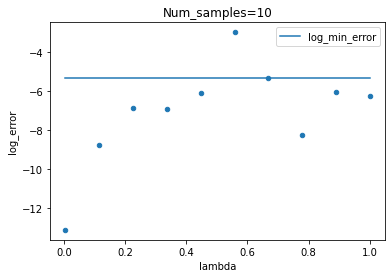

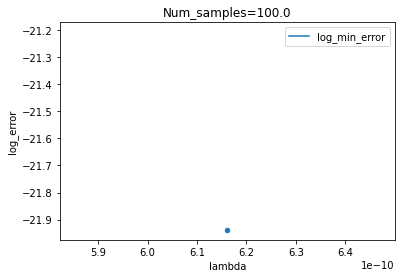

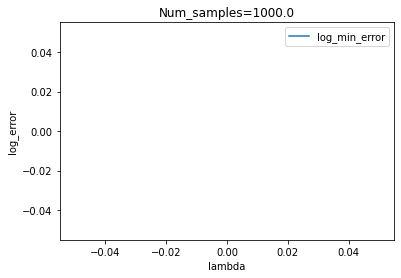

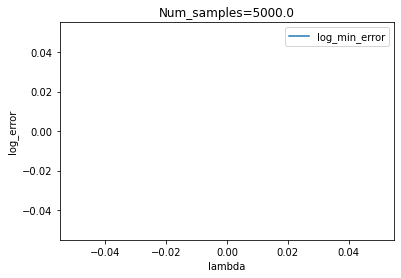

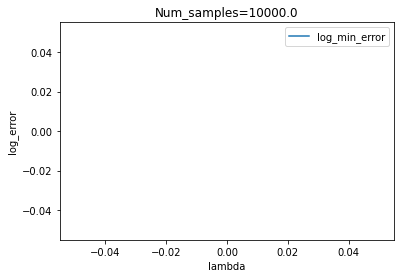

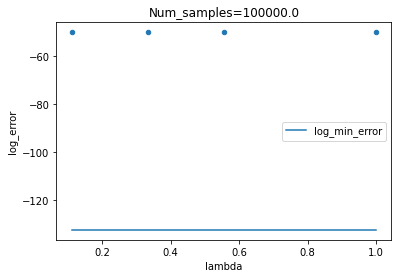

In [26]:
for n in [10, 1e2, 1e3, 5e3, 1e4, 1e5]:
    df = ec2_results_df[(ec2_results_df['num_samples'] == n) & (ec2_results_df['error_ratio'] < 100)]
    ax = df.plot(x='lambda', y='log_error', title="Num_samples={}".format(n), kind='scatter')
    df.plot(ax=ax, x='lambda', y='log_min_error', title="Num_samples={}".format(n))

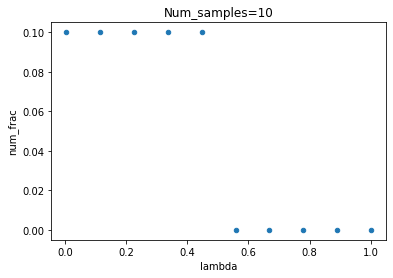

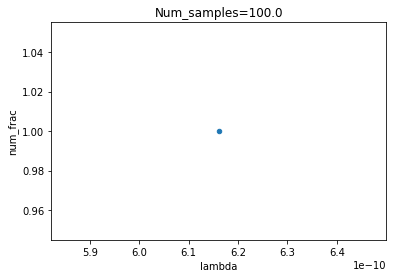

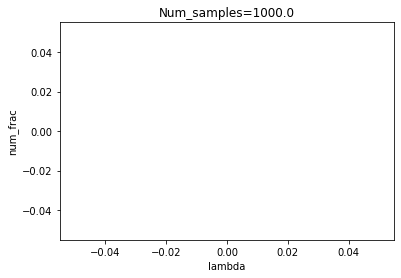

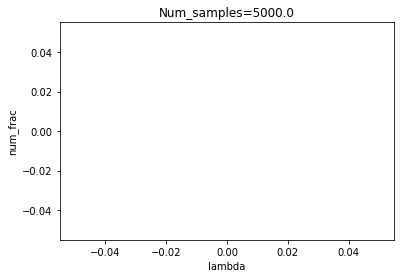

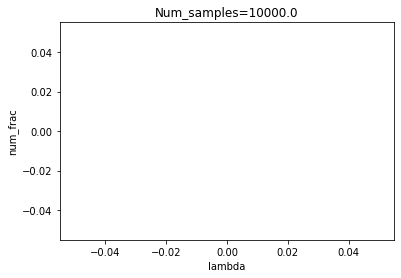

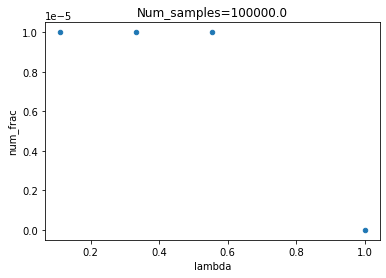

In [28]:
for n in [10, 1e2, 1e3, 5e3, 1e4, 1e5]:
    df = ec2_results_df[(ec2_results_df['num_samples'] == n) & (ec2_results_df['error_ratio'] < 100)]
    ax = df.plot(x='lambda', y='num_frac', title="Num_samples={}".format(n), kind='scatter')

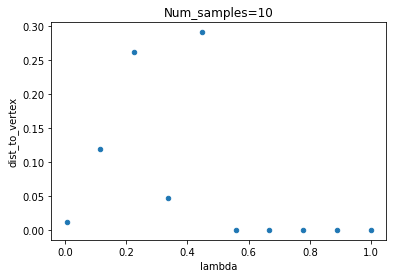

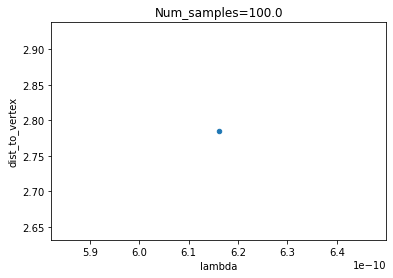

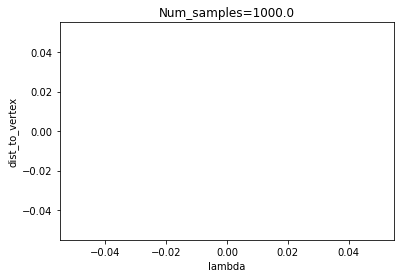

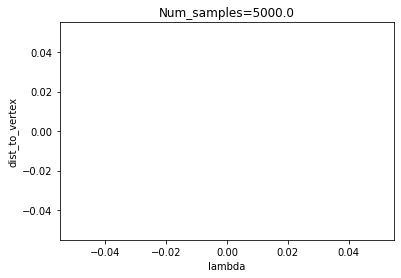

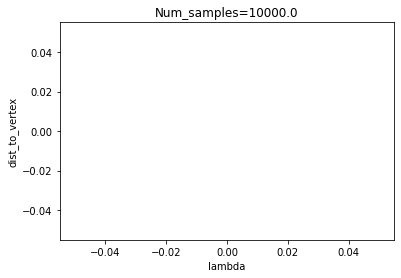

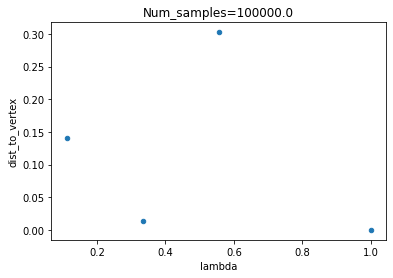

In [29]:
for n in [10, 1e2, 1e3, 5e3, 1e4, 1e5]:
    df = ec2_results_df[(ec2_results_df['num_samples'] == n) & (ec2_results_df['error_ratio'] < 100)]
    ax = df.plot(x='lambda', y='dist_to_vertex', title="Num_samples={}".format(n), kind='scatter')